# Data Science Basics - Logistic Regression - Complete Guide

#### What is Logistic Regression?
Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability. Logistic regression is basically a supervised classification algorithm. In a classification problem, the target variable(or output),y, can take only discrete values for given set of features(or inputs),X. Logistic regression becomes a classification technique only when a decision threshold is brought into the picture. The setting of the threshold value is a very important aspect of Logistic regression and is dependent on the classification problem itself.

Some of the examples of classification problems are Email spam or not spam, Online transactions Fraud or not Fraud, Tumor Malignant or Benign. Logistic regression transforms its output using the logistic sigmoid function to return a probability value.

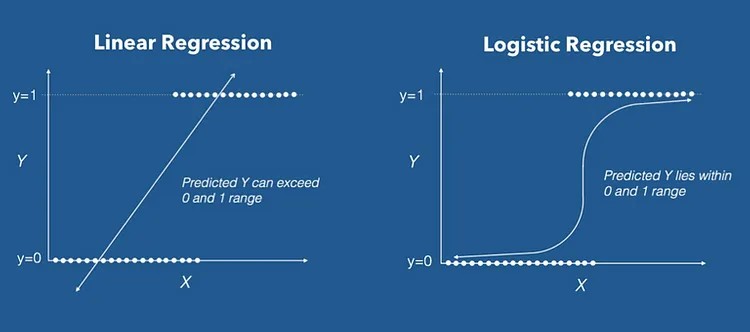

We can call a Logistic Regression as a Linear Regression model but the Logistic Regression uses a more complex cost function, this cost function can be defined as the Sigmoid function or also known as the logistic function instead of a linear function .

The hypothesis of Logistic regression tends it to limit the cost function between 0 and 1. Therefore linear functions fail to represent it as it can have a value greater than 1 or less than 0 which is not possible as per the hypothesis of Logistic regression.

#### What are the types of Logistic regression
Based on the number of categories, Logistic regression can be classified as:

 - Binomial: Target variable can have only 2 possible types: “0” or “1” which may represent “win” vs “loss”, “pass” vs “fail”, “dead” vs “alive”, etc.
 - Multinomial: Target variable can have 3 or more possible types which are not ordered(i.e. types have no quantitative significance) like “disease A” vs “disease B” vs “disease C”.
 - Ordinal: It deals with target variables with ordered categories. For example, a test score can be categorized as:“very poor”, “poor”, “good”, “very good”. Here, each category can be given a score like 0, 1, 2, 3.

#### What is the Sigmoid Function?
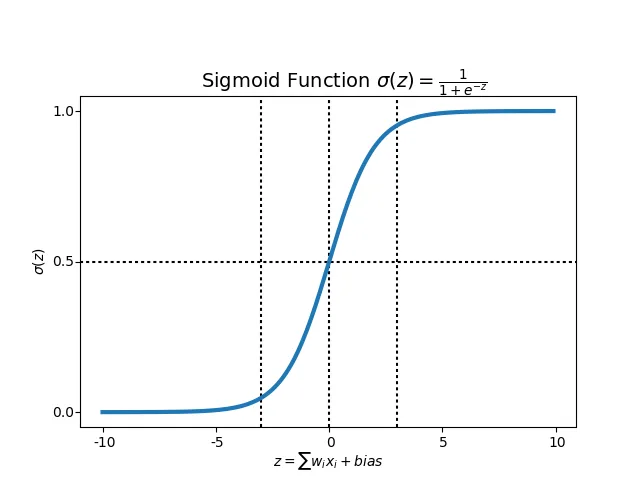

In order to map predicted values to probabilities, we use the Sigmoid function. The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.

In the curve it shown that any small changes in the values of X in that region will cause values of Y to change significantly. That means this function has a tendency to bring the Y values to either end of the curve. Looks like it’s good for a classifier considering its property? Yes ! It indeed is. It tends to bring the activations to either side of the curve.Making clear distinction on prediction.

Another advantage of this activation function is, unlike linear function, the output of the activation function is always going to be in range (0,1) compared to (-inf, inf) of linear function. So we have our activations bound in a range. Nice, it won’t blow up the activations then.

This is great. Sigmoid functions are one of the most widely used activation functions today. Then what are the problems with this?

If you notice, towards either end of the sigmoid function, the Y values tend to respond very less to changes in X. What does that mean? The gradient at that region is going to be small. It gives rise to a problem of “vanishing gradients”. Hmm. So what happens when the activations reach near the “near-horizontal” part of the curve on either sides?

Gradient is small or has vanished (cannot make significant change because of the extremely small value). The network refuses to learn further or is drastically slow ( depending on use case and until gradient /computation gets hit by floating point value limits ). There are ways to work around this problem and sigmoid is still very popular in classification problems.

In order to map predicted values to probabilities, we use the Sigmoid function. The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.

#### Decision Boundary
We expect our classifier to give us a set of outputs or classes based on probability when we pass the inputs through a prediction function and returns a probability score between 0 and 1.

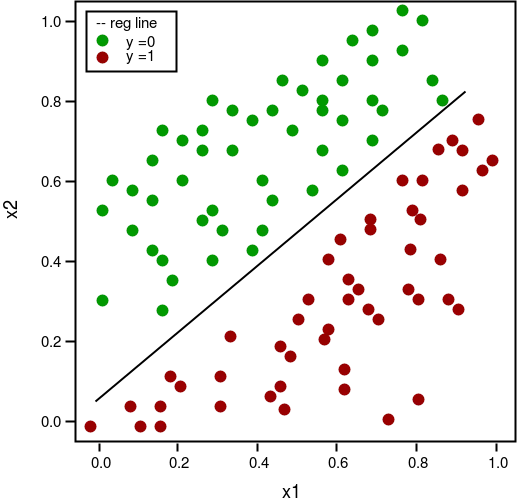

Cost function
We learned about the cost function in the Linear regression, the cost function represents optimization objective i.e. we create a cost function and minimize it so that we can develop an accurate model with minimum error. If we try to use the cost function of the linear regression in Logistic Regression then it would be of no use as it would end up being a non-convex function with many local minimums, in which it would be very difficult to minimize the cost value and find the global minimum.

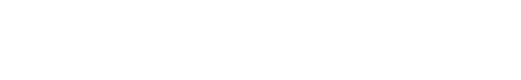

The RMS Titanic was a British passenger liner that sank in theNorth Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression


In [3]:
titanic = sns.load_dataset('titanic')
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [4]:
titanic.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Data understanding


In [5]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### Heatmap
A Heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors. The seaborn python package allows the creation of annotated heatmaps which can be tweaked using Matplotlib tools as per the creator’s requirement.

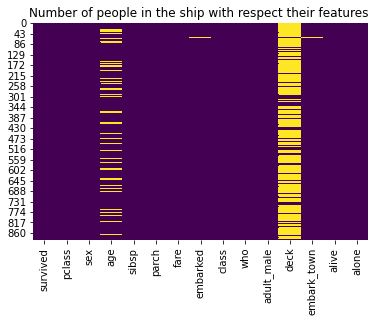

In [6]:
sns.heatmap(titanic.isnull(), cbar = False, cmap = 'viridis')
plt.title('Number of people in the ship with respect their features ')
plt.show()

In [7]:
titanic['age'].isnull().sum()/titanic.shape[0]*100


19.865319865319865

#### Histogram
A Histogram shows the frequency on the vertical axis and the horizontal axis is another dimension. Usually it has bins, where every bin has a minimum and maximum value. Each bin also has a frequency between x and infinite.

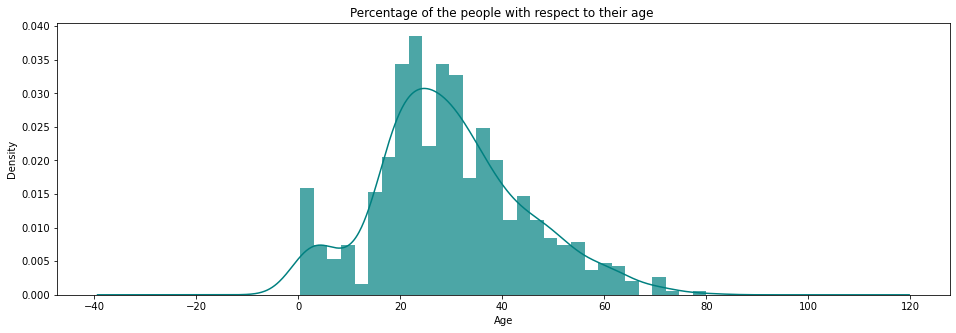

In [8]:
ax = titanic['age'].hist(bins = 30, density = True, stacked = True, color = 'teal', alpha = 0.7, figsize = (16, 5))
titanic['age'].plot(kind = 'density', color = 'teal')
ax.set_xlabel('Age')
plt.title('Percentage of the people with respect to their age ')
plt.show()

In this part of the code, we plotted female survived & not survived passengers and aslo male survived & not survived passengers with respect to their age.

#### distplot
Flexibly plot a univariate distribution of observations.

/Users/gajendrasahu/opt/anaconda3/envs/tensorflow20/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gajendrasahu/opt/anaconda3/envs/tensorflow20/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gajendrasahu/opt/anaconda3/envs/tensorflow20/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

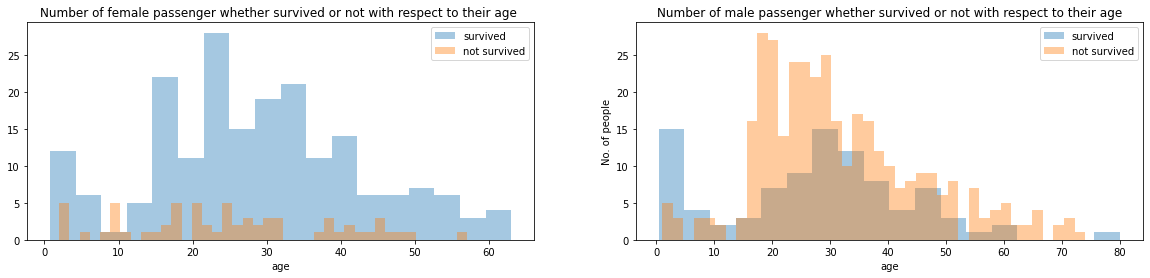

In [10]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 4))
women = titanic[titanic['sex'] == 'female']
men = titanic[titanic['sex'] == 'male']

ax = sns.distplot(women[women[survived]==1].age.dropna(), bins = 18, label = survived, ax = axes[0], kde = False)
ax = sns.distplot(women[women[survived]==0].age.dropna(), bins = 40, label = not_survived, ax = axes[0], kde = False)
ax.legend()
ax.set_title('Number of female passenger whether survived or not with respect to their age ')
ax = sns.distplot(men[men[survived]==1].age.dropna(), bins = 18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men[survived]==0].age.dropna(), bins = 40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Number of male passenger whether survived or not with respect to their age')
plt.ylabel('No. of people')
plt.show()

In [11]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

Let’s observe the people with respect to thier age who are in pclass. We will get this by using catplot() function.

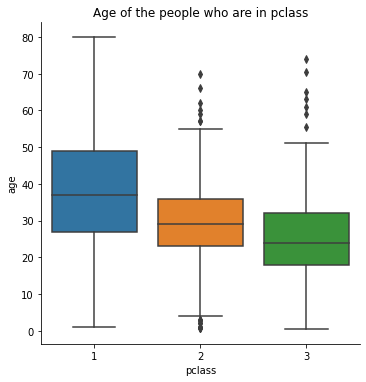

In [12]:
sns.catplot(x = 'pclass', y = 'age', data = titanic, kind = 'box')
plt.title('Age of the people who are in pclass')
plt.show()

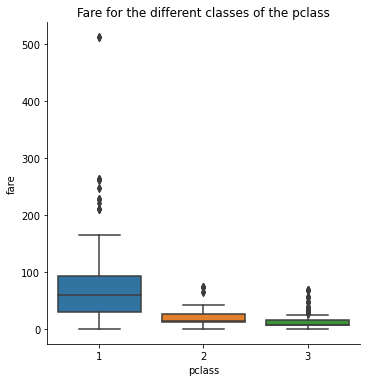

In [13]:
sns.catplot(x = 'pclass', y = 'fare', data = titanic, kind = 'box')
plt.title('Fare for the different classes of the pclass')
plt.show()

In [14]:
titanic[titanic['pclass'] == 1]['age'].mean()


38.233440860215055

In [15]:
titanic[titanic['pclass'] == 2]['age'].mean()


29.87763005780347

In [16]:
titanic[titanic['pclass'] == 3]['age'].mean()


25.14061971830986

#### Imputation
In the following function,We are dealing with missing values by using imputation.Imputation is the process of replacing missing data with substituted values.The missing values are substituted by another computed value.

In [17]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return titanic[titanic['pclass'] == 1]['age'].mean()
        elif pclass == 2:
            return titanic[titanic['pclass'] == 2]['age'].mean()
        elif pclass == 3:
            return titanic[titanic['pclass'] == 3]['age'].mean()
        
    else:
        return age

In [18]:
titanic['age'] = titanic[['age', 'pclass']].apply(impute_age, axis = 1)


Let’s see the resultant plot :

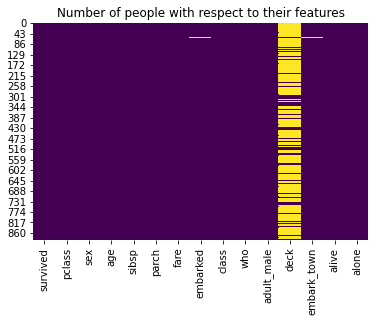

In [19]:
sns.heatmap(titanic.isnull(), cbar = False, cmap = 'viridis')
plt.title('Number of people with respect to their features')
plt.show()

#### Analysing Embarked
Analyzing number of passengers get into the ship.

Facegrid: Multi-plot grid for plotting conditional relationships.

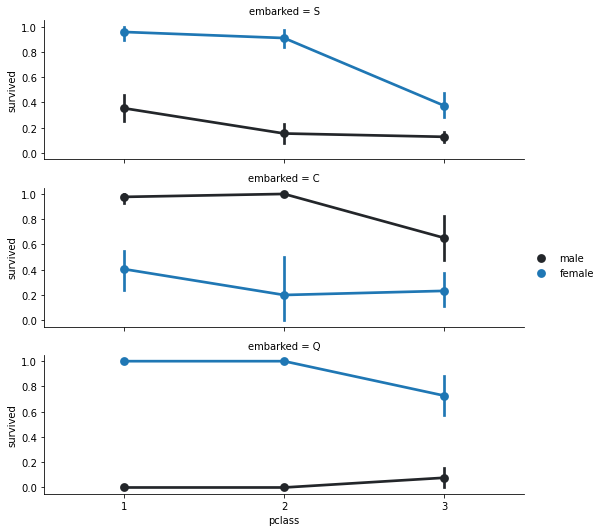

In [20]:
f = sns.FacetGrid(titanic, row = 'embarked', height = 2.5, aspect= 3)
f.map(sns.pointplot, 'pclass', 'survived', 'sex', order = None, hue_order = None)
f.add_legend()
plt.show()

In [21]:
titanic['embarked'].isnull().sum()

2

In [22]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [24]:
common_value = 'S'
titanic['embarked'].fillna(common_value, inplace = True) 
titanic['embarked'].isnull().sum()

0

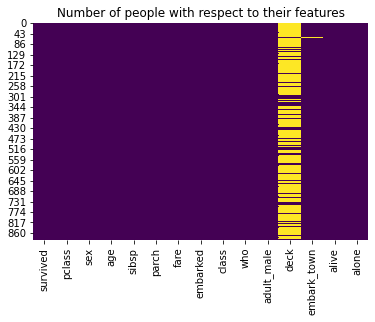

In [25]:
sns.heatmap(titanic.isnull(), cbar = False, cmap = 'viridis')
plt.title('Number of people with respect to their features')
plt.show()

We will try to print the output by removing labes: deck, embark_town, alive. We will do this by using drop() function.

The drop() function is used to drop specified labels from rows or columns. Let’s look into the script:

In [26]:
titanic.drop(labels=['deck', 'embark_town', 'alive'], inplace = True, axis = 1)


Here is the resultant output :

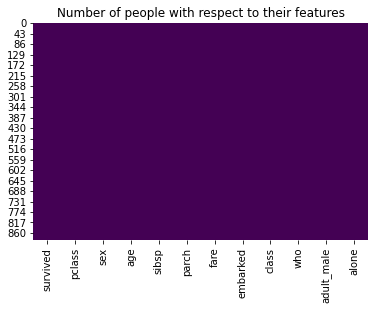

In [27]:
sns.heatmap(titanic.isnull(), cbar = False, cmap = 'viridis')
plt.title('Number of people with respect to their features')
plt.show()

Here we can observe the difference between two figures.

In [29]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


In [30]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True


In [31]:
titanic['fare'] = titanic['fare'].astype('int')
titanic['age'] = titanic['age'].astype('int')
titanic['pclass'] = titanic['pclass'].astype('int')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    int64   
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    int64   
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), int64(6), object(3)
memory usage: 65.5+ KB


#### Convert categorical data into numerical data
In this part categorical data( male , female) converted into numeriacl data(0,1,2..).

In [32]:
genders = {'male': 0, 'female': 1}
titanic['sex'] = titanic['sex'].map(genders)

who = {'man': 0, 'women': 1, 'child': 2}
titanic['who'] = titanic['who'].map(who)

adult_male = {True: 1, False: 0}
titanic['adult_male'] = titanic['adult_male'].map(adult_male)

alone = {True: 1, False: 0}
titanic['alone'] = titanic['alone'].map(alone)            

ports = {'S': 0, 'C': 1, 'Q': 2}
titanic['embarked'] = titanic['embarked'].map(ports)  

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,0,Third,0.0,1,0
1,1,1,1,38,1,0,71,1,First,NaN,0,0
2,1,3,1,26,0,0,7,0,Third,NaN,0,1
3,1,1,1,35,1,0,53,0,First,NaN,0,0
4,0,3,0,35,0,0,8,0,Third,0.0,1,1


In [33]:
titanic.drop(labels = ['class', 'who'], axis = 1, inplace= True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22,1,0,7,0,1,0
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,26,0,0,7,0,0,1
3,1,1,1,35,1,0,53,0,0,0
4,0,3,0,35,0,0,8,0,1,1


#### Build Logistic Regression Model
In this part of code,we try to buid a Logistic model for the data values.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [36]:
X = titanic.drop('survived', axis = 1)
y = titanic['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)                           

In [37]:
model = LogisticRegression(solver= 'lbfgs', max_iter = 400)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model.score(X_test, y_test)

0.8271186440677966

#### Let’s go ahead with age and fare grouping

#### Recursive Feature Elimination :
Given an external estimator that assigns weights to features, recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a featureimportances attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

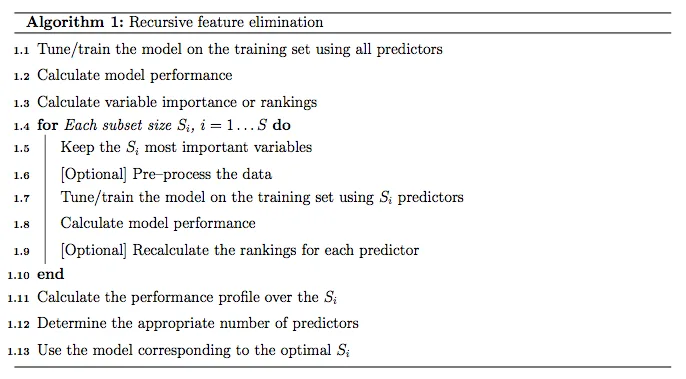

In [38]:
from sklearn.feature_selection import RFE

In [39]:
model = LogisticRegression(solver='lbfgs', max_iter=500)
rfe = RFE(model, 5, verbose=1)
rfe = rfe.fit(X, y)
rfe.support_

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


/Users/gajendrasahu/opt/anaconda3/envs/tensorflow20/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


array([ True, False, False,  True,  True, False, False,  True,  True])

In [40]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22,1,0,7,0,1,0
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,26,0,0,7,0,0,1


In [41]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,3,0,22,1,0,7,0,1,0
1,1,1,38,1,0,71,1,0,0
2,3,1,26,0,0,7,0,0,1
3,1,1,35,1,0,53,0,0,0
4,3,0,35,0,0,8,0,1,1


In [42]:
XX = X[X.columns[rfe.support_]]

In [43]:
XX.head()

,pclass,sibsp,parch,adult_male,alone
0,3,1,0,1,0
1,1,1,0,0,0
2,3,0,0,0,1
3,1,1,0,0,0
4,3,0,0,1,1


In [44]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.2, random_state = 8, stratify = y)

In [45]:
model = LogisticRegression(solver= 'lbfgs', max_iter = 500)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model.score(X_test, y_test)

0.8547486033519553

#### Accuracy, F1-Score, P, R, AUC_ROC curve
Let’s have some discussions on Precision, Recall, Accuracy .
 - Accuracy tells the fraction of predictions our model got right .
 - Recall tells us amount of actual positives are identified correctly .
 - Precision tells us amount of positive proportion identifications are actually correct .
Have a look at following formulae:
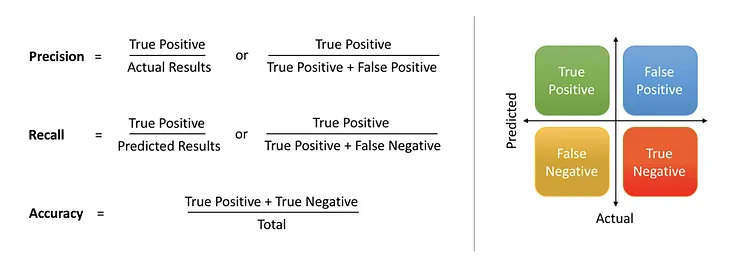

In [46]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, auc, log_loss

In [47]:
model = LogisticRegression(solver= 'lbfgs', max_iter = 500)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

#### Predict_proba ( )
The function predict_proba() returns a numpy array of two columns. The first column is the probability that target=0 and the second column is the probability that target=1. That is why we add [:,1] after predict_proba() in order to get the probabilities of target=1.

Let’s find out y_predict_prob by using predict_proba() .Now have a look into the script:

In [48]:
y_predict_prob = model.predict_proba(X_test)[:, 1]
y_predict_prob[: 5]

array([0.55566832, 0.87213996, 0.09376084, 0.09376084, 0.37996908])

We will compute the Compute Receiver operating characteristic (ROC) by using the function roc_curve().Since the thresholds are sorted from low to high values, they are reversed upon returning them to ensure they correspond to both fpr and tpr, which are sorted in reversed order during their calculation.
Let’s see into the script:

In [49]:
[fpr, tpr, thr] = roc_curve(y_test, y_predict_prob)
[fpr, tpr, thr][: 2]

[array([0.        , 0.        , 0.        , 0.        , 0.00909091,
        0.00909091, 0.00909091, 0.00909091, 0.00909091, 0.00909091,
        0.03636364, 0.03636364, 0.03636364, 0.06363636, 0.09090909,
        0.12727273, 0.12727273, 0.13636364, 0.21818182, 0.23636364,
        0.24545455, 0.27272727, 0.29090909, 0.43636364, 0.45454545,
        0.47272727, 0.52727273, 0.92727273, 1.        ]),
 array([0.        , 0.07246377, 0.20289855, 0.24637681, 0.33333333,
        0.39130435, 0.44927536, 0.55072464, 0.60869565, 0.63768116,
        0.63768116, 0.65217391, 0.69565217, 0.7826087 , 0.7826087 ,
        0.7826087 , 0.79710145, 0.79710145, 0.86956522, 0.88405797,
        0.88405797, 0.88405797, 0.88405797, 0.89855072, 0.91304348,
        0.91304348, 0.92753623, 1.        , 1.        ])]

Now we will calculate accuracy of predicted data ,log loss and auc.To get this we will use functions accuracy_score(), log_loss(), auc().

#### accuracy_score( )
In multilabel classification, this function can compute subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

#### log_loss( )
It is defined as the negative log-likelihood of a logistic model that returns y_pred probabilities for its training data y_true .

#### auc( )
Compute Area Under the Curve (AUC),ROC using the trapezoidal rule.
Let’s look into the script:

In [50]:
print('Accuracy: ', accuracy_score(y_test, y_predict))
print('log loss: ', log_loss(y_test, y_predict_prob))
print('auc: ', auc(fpr, tpr))

Accuracy:  0.8547486033519553
log loss:  0.36597373727139876
auc:  0.9007246376811595


In [51]:
idx = np.min(np.where(tpr>0.95))

#### Plot for True Positive Rate (recall) vs False Positive Rate (1 – specificity) i.e. Receiver operating characteristic (ROC) curve.
A receiver operating characteristic curve, ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

True positive rate = correctly identified(For example : Sick people correctly identified as sick)
False positive rate = Incorrectly identified(For example : Healthy people incorrectly identified as sick) .

Now we will try to plot the Receiver Operating Characteristics curve.Let’s have a look at the following code:

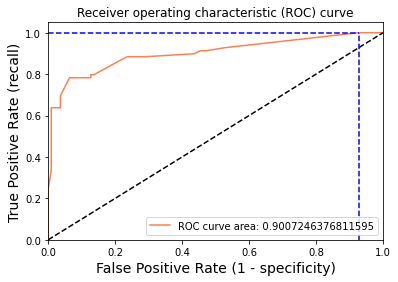

Using a threshold of 0.094 guarantees a sensitivity of 1.000 and a specificity of 0.073, i.e. a false positive rate of 92.73%.


In [52]:
plt.figure()
plt.plot(fpr, tpr, color = 'coral', label = "ROC curve area: " + str(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color = 'blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))